In [599]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, plot_confusion_matrix, log_loss, roc_auc_score
from math import sqrt
warnings.filterwarnings("ignore")

In [600]:
data = pd.read_csv("phones.csv")
data1 = data
print("Shape of the data is: {}".format(data.shape))
data.head()

Shape of the data is: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [601]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [602]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [603]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [604]:
X = data.drop(columns=["price_range"])
y = data["price_range"]

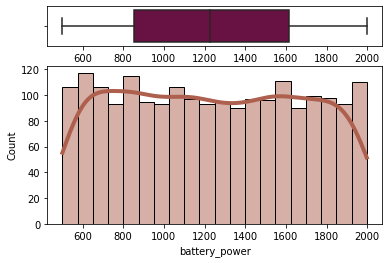

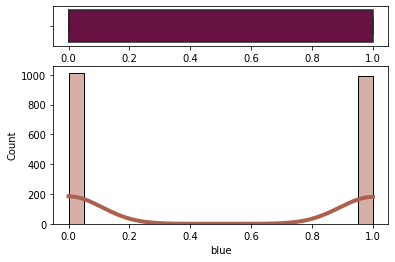

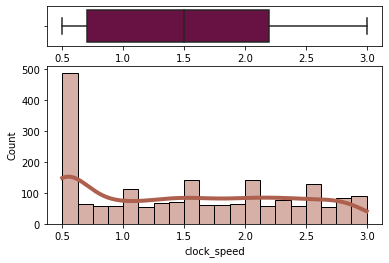

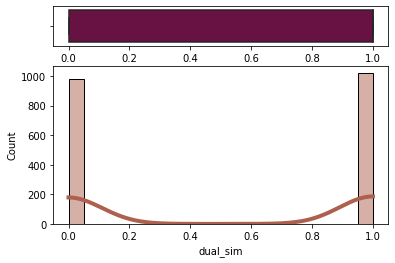

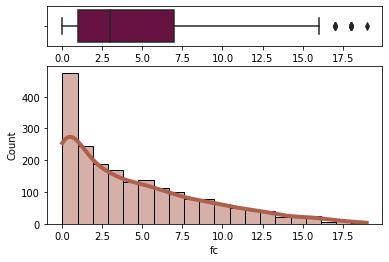

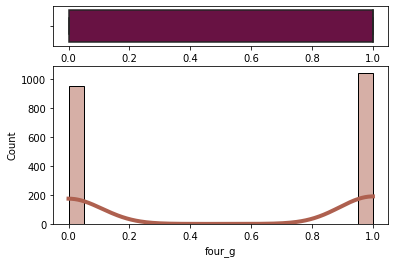

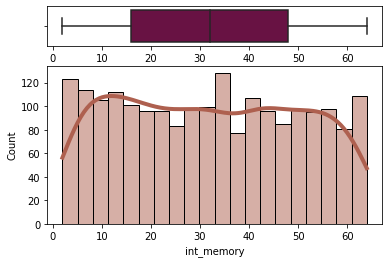

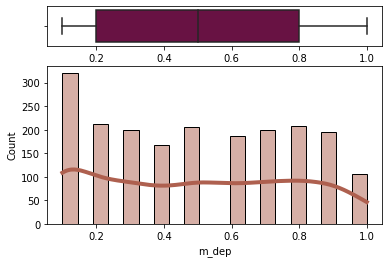

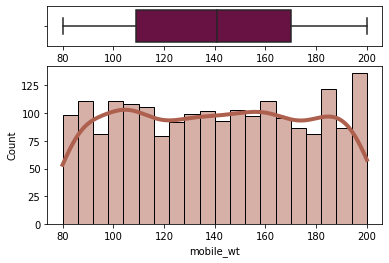

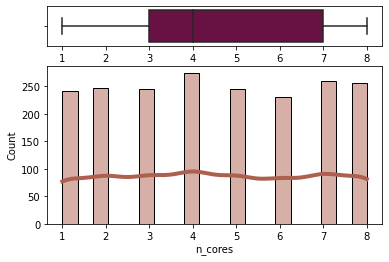

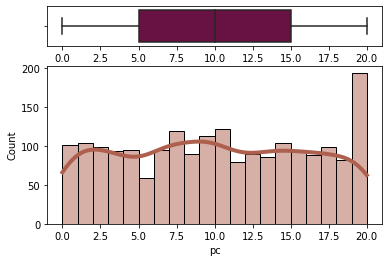

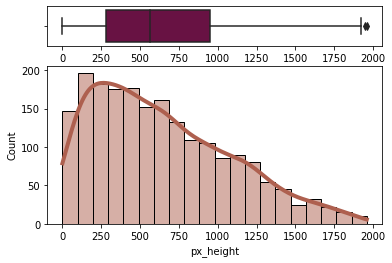

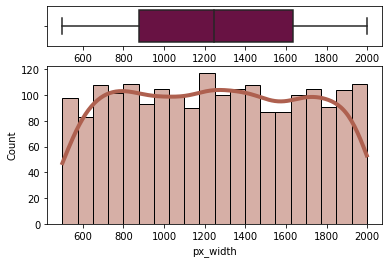

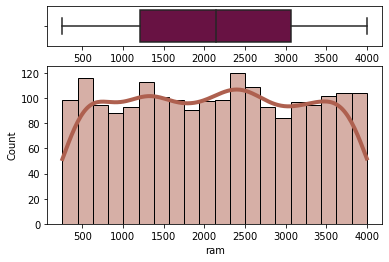

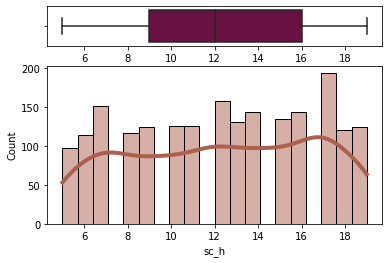

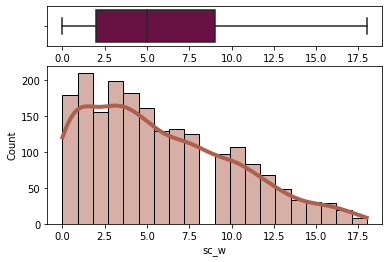

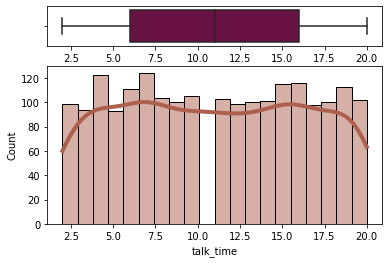

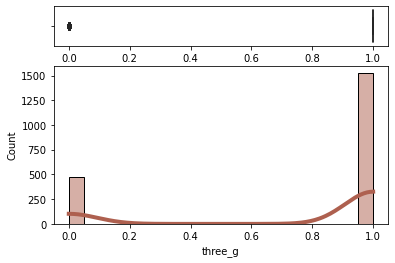

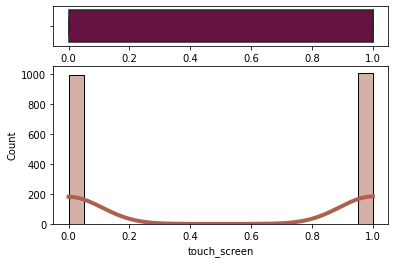

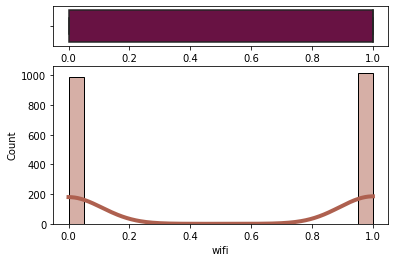

In [605]:
for i in X.select_dtypes(include="number").columns.difference(["price_range"]):
    fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=i,data=X, color="#760445", ax=ax1)
    sns.histplot(x=i,data=X, kde=True, color="#AE604F", line_kws={"lw":4}, bins=20, ax=ax2)
    plt.show()

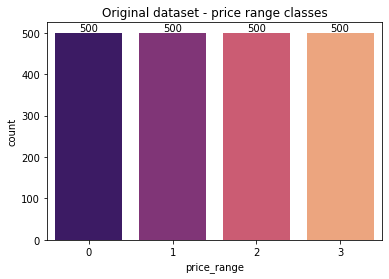

In [606]:
haz = sns.countplot(x="price_range", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Original dataset - price range classes")
plt.show()

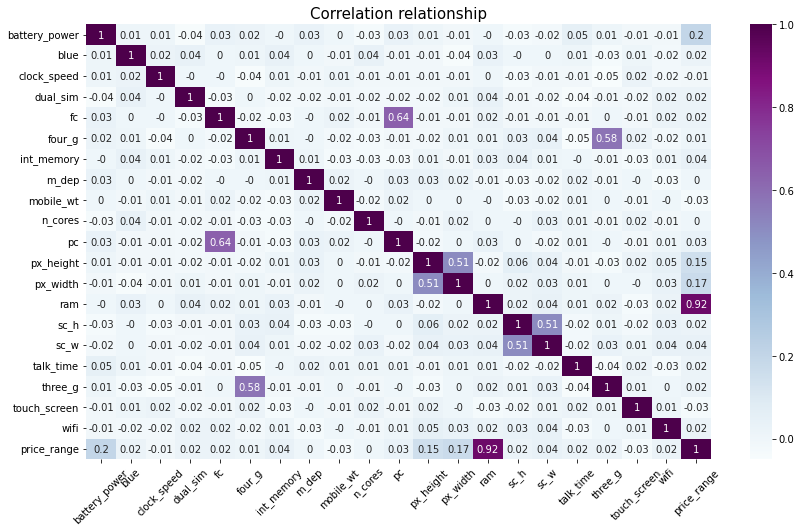

In [607]:
plt.figure(figsize=(14,8))
sns.heatmap(round(data.corr(),2), annot=True, cmap="BuPu")
plt.title("Correlation relationship", size=15)
plt.xticks(rotation=45)
plt.show()

In [608]:
data["price_range"] = data["price_range"].astype("category")

In [609]:
data.dtypes

battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range      category
dtype: object

# ---------------------------------------------

In [610]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)

In [611]:
numerical_features = X.select_dtypes(include="number").columns
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
    ])
categorical_features = X.select_dtypes(include=["object","category"]).columns
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[
    ("num",numerical_transformer,numerical_features),
    ("cat",categorical_transformer, categorical_features)])
# reg = Pipeline(steps=[
#     ("preprocessor",preprocessor),
#     ("regressor",GradientBoostingRegressor())
# ])
# reg.fit(xTrain,yTrain)

results_table = pd.DataFrame(columns=["model","acc_train","acc_test","roc_auc","precision","recall","f1"])

In [612]:
def results(model):
    global seenData, unseenData, predictedData, dataMerged, x, results_table
    x = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",model)])
    x.fit(xTrain,yTrain)
    print("CROSS-VALIDATION TRAINING DATASET - ACCURACY")
    print(cross_val_score(x, xTrain, yTrain, scoring="accuracy").mean(),"\n")
    print("TESTING DATASET RESULTS")
    print("Accuracy: {}".format(x.score(xTest,yTest)))
    print("Log-loss of the testing dataset:", log_loss(yTest, x.predict_proba(xTest)))
    print("ROC-AUC score of the testing dataset:", roc_auc_score(yTest, x.predict_proba(xTest), multi_class="ovr"))
    print(classification_report(yTest,x.predict(xTest)))
    plot_confusion_matrix(x,xTest,yTest)
    plt.show()
    results_table.loc[len(results_table)] = [len(results_table)+1,x.score(xTrain,yTrain),x.score(xTest,yTest), roc_auc_score(yTest, x.predict_proba(xTest), multi_class="ovr"), precision_score(yTest,x.predict(xTest),average="macro"),recall_score(yTest,x.predict(xTest),average="macro"), f1_score(yTest,x.predict(xTest),average="macro")]
    seenData = pd.DataFrame({"Actual":yTrain,"Predicted":x.predict(xTrain),"Status":"Seen"})
    unseenData = pd.DataFrame({"Actual":yTest,"Predicted":x.predict(xTest),"Status":"Unseen"})
    predictedData = pd.concat([seenData,unseenData])
    dataMerged = pd.merge(left=data1,right=predictedData,left_index=True,right_index=True,how="inner")

In [613]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
models = {1:"LogisticRegression",2:"DecisionTreeClassifier",3:"RandomForestClassifier",4:"GradientBoostingClassifier",5:"KNeighborsClassifier",6:"XGBClassifier"}

CROSS-VALIDATION TRAINING DATASET - ACCURACY
0.9560000000000001 

TESTING DATASET RESULTS
Accuracy: 0.976
Log-loss of the testing dataset: 0.19557674877021702
ROC-AUC score of the testing dataset: 0.9985089737788891
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       125
           1       0.95      0.98      0.97       116
           2       0.97      0.95      0.96       110
           3       0.99      0.99      0.99       149

    accuracy                           0.98       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.98      0.98      0.98       500



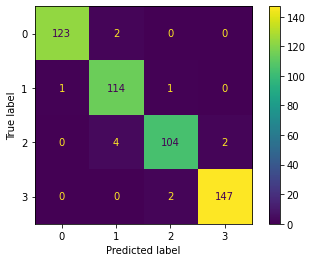

In [614]:
results(LogisticRegression())

In [615]:
x

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression())])

CROSS-VALIDATION TRAINING DATASET - ACCURACY
0.8173333333333334 

TESTING DATASET RESULTS
Accuracy: 0.828
Log-loss of the testing dataset: 5.940669539924638
ROC-AUC score of the testing dataset: 0.8834615188307566
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       125
           1       0.74      0.88      0.81       116
           2       0.70      0.70      0.70       110
           3       0.89      0.86      0.87       149

    accuracy                           0.83       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.84      0.83      0.83       500



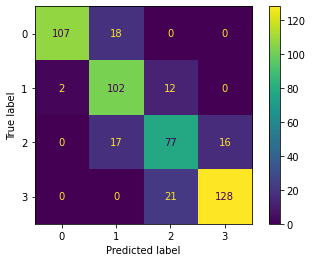

In [616]:
results(DecisionTreeClassifier())

CROSS-VALIDATION TRAINING DATASET - ACCURACY
0.8666666666666666 

TESTING DATASET RESULTS
Accuracy: 0.9
Log-loss of the testing dataset: 0.5622745001031284
ROC-AUC score of the testing dataset: 0.9776271099025515
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       125
           1       0.82      0.88      0.85       116
           2       0.80      0.85      0.83       110
           3       0.99      0.91      0.95       149

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.91      0.90      0.90       500



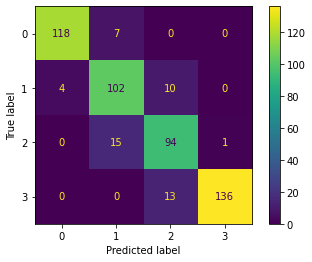

In [617]:
results(RandomForestClassifier())

CROSS-VALIDATION TRAINING DATASET - ACCURACY
0.8899999999999999 

TESTING DATASET RESULTS
Accuracy: 0.928
Log-loss of the testing dataset: 0.22278969864266177
ROC-AUC score of the testing dataset: 0.9873480799988379
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       125
           1       0.86      0.93      0.89       116
           2       0.88      0.85      0.87       110
           3       0.98      0.95      0.97       149

    accuracy                           0.93       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.93      0.93      0.93       500



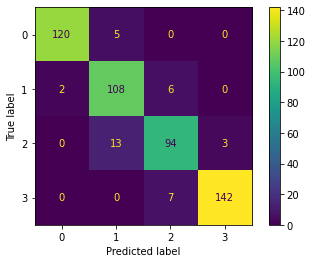

In [618]:
results(GradientBoostingClassifier())

CROSS-VALIDATION TRAINING DATASET - ACCURACY
0.508 

TESTING DATASET RESULTS
Accuracy: 0.494
Log-loss of the testing dataset: 3.5952125636206067
ROC-AUC score of the testing dataset: 0.7484962514283704
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       125
           1       0.35      0.41      0.37       116
           2       0.36      0.50      0.42       110
           3       0.85      0.39      0.53       149

    accuracy                           0.49       500
   macro avg       0.54      0.50      0.49       500
weighted avg       0.57      0.49      0.50       500



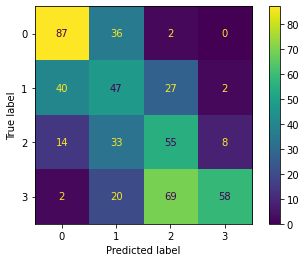

In [619]:
results(KNeighborsClassifier())

CROSS-VALIDATION TRAINING DATASET - ACCURACY
0.9066666666666666 

TESTING DATASET RESULTS
Accuracy: 0.924
Log-loss of the testing dataset: 0.20673853630401573
ROC-AUC score of the testing dataset: 0.9902156391713182
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.88      0.92      0.90       116
           2       0.83      0.87      0.85       110
           3       0.99      0.92      0.95       149

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500



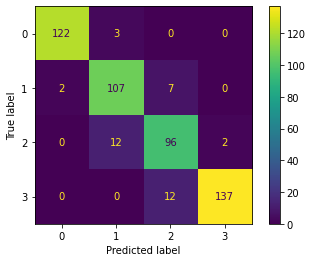

In [620]:
results(XGBClassifier())

In [621]:
results_table["model"].replace(models,inplace=True)
results_table.style.highlight_max(subset=["acc_test","roc_auc","precision","recall","f1"],color="#874C62")

,model,acc_train,acc_test,roc_auc,precision,recall,f1
0,LogisticRegression,0.974000,0.976000,0.998509,0.975119,0.974698,0.974789
1,DecisionTreeClassifier,1.000000,0.828000,0.883462,0.828766,0.823593,0.823644
2,RandomForestClassifier,1.000000,0.900000,0.977627,0.896478,0.897652,0.896177
3,GradientBoostingClassifier,1.000000,0.928000,0.987348,0.924641,0.924650,0.924142
4,KNeighborsClassifier,0.692667,0.494000,0.748496,0.541600,0.497609,0.493771
5,XGBClassifier,1.000000,0.924000,0.990216,0.920329,0.922651,0.920950


CROSS-VALIDATION TRAINING DATASET - ACCURACY
0.9560000000000001 

TESTING DATASET RESULTS
Accuracy: 0.976
Log-loss of the testing dataset: 0.19557674877021702
ROC-AUC score of the testing dataset: 0.9985089737788891
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       125
           1       0.95      0.98      0.97       116
           2       0.97      0.95      0.96       110
           3       0.99      0.99      0.99       149

    accuracy                           0.98       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.98      0.98      0.98       500



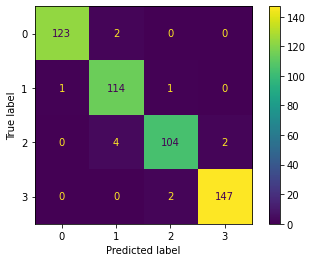

In [622]:
# Best results - Random Forest Regressor
results(LogisticRegression())

In [623]:
print("Number of correct predictions: {}".format(len(dataMerged[dataMerged["Predicted"] == dataMerged["Actual"]])))
print("Number of wrong predictions: {}".format(len(dataMerged[dataMerged["Predicted"] != dataMerged["Actual"]])))
dataMerged.head()

Number of correct predictions: 1949
Number of wrong predictions: 51


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Actual,Predicted,Status
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,1,1,Seen
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,2,3,Unseen
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,2,2,Seen
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,2,2,Seen
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,1,1,Unseen
